# Credit Card Fraud Detection. 
### From Kaggle...

https://www.kaggle.com/dalpozz/creditcardfraud

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML

Please cite: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

# Objective: 

Objective here is to show the difference in scores (accuracy, recall, precision) between an undersampled dataset with even label distribution and a dataset with unbalanced label distribution. I will also be comparing two classifiers: RandomForest and LogisticRegression  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, recall_score, classification_report, precision_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [2]:
import itertools

In [3]:
sss= StratifiedShuffleSplit(n_splits = 5, test_size=.3, train_size=.7, random_state=0)

In [4]:
data = pd.read_csv('creditcard.csv')

In [5]:
data['ScaledAmount'] = StandardScaler().fit_transform(data['Amount'])

C:\Users\Papasmurfff\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Papasmurfff\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [6]:
data.drop('Amount', axis=1, inplace= True)

In [7]:
X = data.iloc[:, data.columns != 'Class'].drop('Time', axis = 1)
y = data.iloc[:, data.columns=='Class']

In [8]:
y['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
print('Percentage of fraud cases: ', y['Class'].value_counts()[1]/y['Class'].value_counts().sum()*100)

Percentage of fraud cases:  0.172748563062


In [10]:
def conf_matrix_recall_precision_roc(y_test_, y_pred_, x_test_, estimator):   
    
    #Confusion Matrix
    conf_matrix = confusion_matrix(y_test_, y_pred_)
    plt.figure()
    plt.imshow(conf_matrix, cmap= plt.cm.Blues)
    plt.title('Confusion Matrix')
    ticks = [0,1]
    plt.xlabel('Predictions')
    plt.ylabel('True Labels')
    plt.xticks(ticks, [0,1])
    plt.yticks(ticks, [0,1])
    plt.colorbar()

    for j,i in itertools.product(range(2), range(2)):

        plt.text(j,i, conf_matrix[i,j], horizontalalignment='center', color='red')
        
    #Precision/Recall Threshold Plot
    plt.figure()
    
    #probability instance is positive (1); decision_function can also be used here 
    # Predict proba outputs probablilty the instance being in each class
    #decision function measures the distnace to separating hyperplane. 
    
    # I chose predict_proba here because so this function can be used with Random Forest as well.. since RF does not have decision_function
    y_score = estimator.best_estimator_.predict_proba(x_test_)[:,1]

    precision, recall, threshold = precision_recall_curve(y_test_,y_score)

    plt.plot(threshold, precision[:-1], label = 'Precision')
    plt.plot(threshold, recall[:-1], label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('_Percentage')
    plt.legend(loc = 'upper right')
    plt.title('Precision/Recall vs Threshold')
    
    #ROC Curve
    plt.figure()
    fpr, tpr, threshold_roc = roc_curve(y_test_,y_score)

    plt.plot(fpr,tpr)
    plt.plot([0,1], [0,1], 'g--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve')
        
      
    accuracy = sum(np.array(y_pred_.reshape(-1,1)==y_test_))/len(y_test_)
    return print('Accuracy: {}'.format( accuracy[0]), 
                 '\nRecall Score: {}'.format(recall_score(y_test_,y_pred_ )),
                 '\nPrecision Score: {}'.format(precision_score(y_test_, y_pred_))
                )
    

# Classifying with Logistic Regression using Whole data set


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [12]:
params = {'C': np.logspace(-3,3,7), 'penalty': ['l1', 'l2']}
lr_base = GridSearchCV(LogisticRegression(), param_grid = params, cv= sss, n_jobs=-1)

In [13]:
lr_base.fit(X_train,y_train)

C:\Users\Papasmurfff\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.3,
            train_size=0.7),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [14]:
y_pred = lr_base.predict(X_test)

### Wow 99% Accuracy! Good right?! 
### Wrong
For unbalanced datasets we want to look into other metrics such as recall and precision. In this case, we care about the Recall score because we want to minimize the number of cases we detect 'no fraud' when in fact it is 'fraud.' But keep in mind, accuracy matters as well because let's say we classify every instance as a fraud. Sure, our recall will be 100%...but that also means workers would be making a phone calls to users everytime there is a transaction...So let's get our accuracy score up AND recall score

Accuracy: 0.9992764956855735 
Recall Score: 0.6241610738255033 
Precision Score: 0.8857142857142857


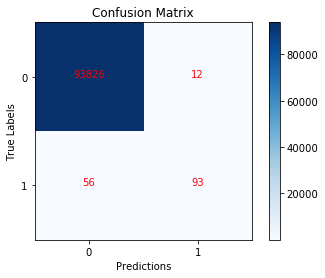

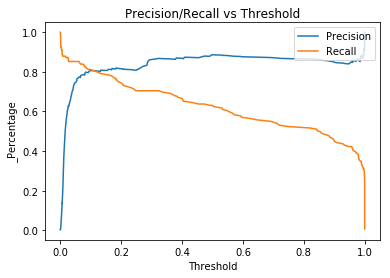

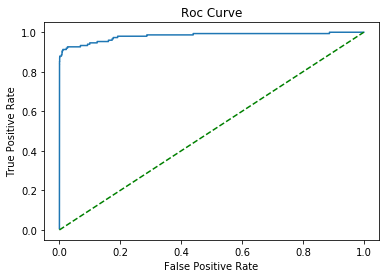

In [16]:
conf_matrix_recall_precision_roc(y_test,y_pred, X_test, lr_base)

# Undersampling Approach

I will undersample the 'not fraud' data such that there is 50/50 distribution between 'fraud' and 'not fraud' and then apply the fitted algorithm onto the whole set

In [17]:
#finding the index of fraud and picking random index of not-fraud  
fraud_index = np.array(y[y['Class']==1].index)

#creating new resampled dataset
nonfraud_index = np.random.choice(np.array(y[y['Class']==0].index), size= len(fraud_index), replace = False)
undersample_indices = np.concatenate((fraud_index, nonfraud_index))
underSample = data.iloc[undersample_indices]
X_underSample = underSample.drop(['Time','Class'], axis=1)
y_underSample= underSample[['Class']]

X_tr_underSample, X_te_underSample, y_tr_underSample, y_te_underSample = train_test_split(
    X_underSample, y_underSample, test_size=0.33, random_state=42)

### Logistic Regression

In [18]:
params = {'C': np.logspace(-3,3,7), 'penalty':['l1', 'l2']}
lr_underSample = GridSearchCV(LogisticRegression(), param_grid=params, n_jobs=-1, cv=sss)
lr_underSample.fit(X_tr_underSample,y_tr_underSample)

C:\Users\Papasmurfff\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.3,
            train_size=0.7),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [20]:
y_pred_uS = lr_underSample.predict(X_te_underSample)

### These scores are pretty good. looking at the precion/recall vs threshold plot... we can adjust the threshold to about 0.4 so that our recall score can get a little boost while sacrificing precision score (remember we care about recall). But lets skip this for now and see how our fitted alorithm does on the whole dataset. 

Accuracy: 0.9415384615384615 
Recall Score: 0.9207317073170732 
Precision Score: 0.9617834394904459


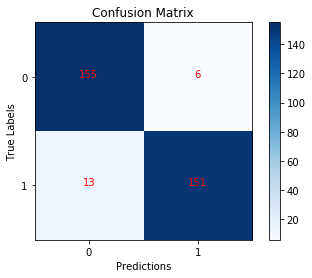

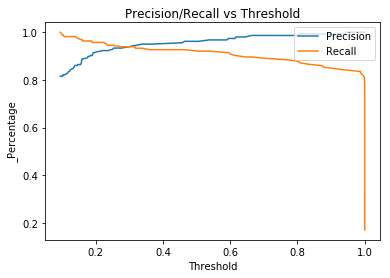

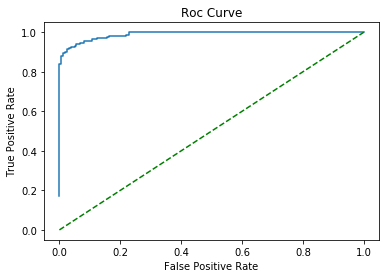

In [21]:
conf_matrix_recall_precision_roc(y_te_underSample, y_pred_uS, X_te_underSample, lr_underSample)

## Applying this to the entire dataset ...treating it as our test dataset

In [22]:
X_fullSample = data.drop(['Class','Time'], axis=1)

In [23]:
y_fullSample = data[['Class']]

In [24]:
y_pred_fS = lr_underSample.predict(X_fullSample)

# Look at those scores! 

Recall improved about 30% more than our base estimator. And accuracy is still at a high 96% 

Accuracy: 0.9692072175192323 
Recall Score: 0.9227642276422764 
Precision Score: 0.04942303505334204


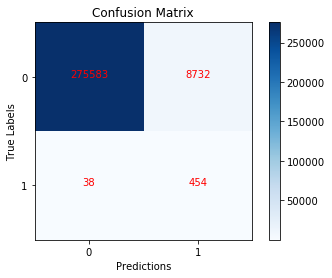

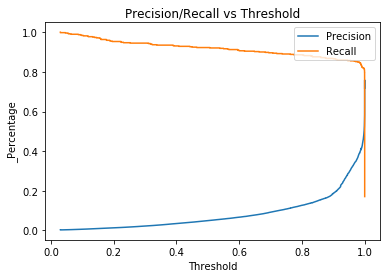

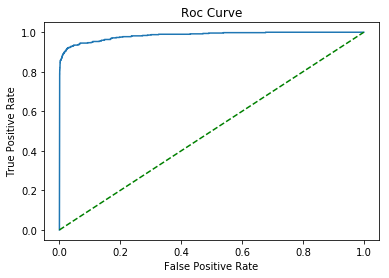

In [25]:
conf_matrix_recall_precision_roc(y_fullSample, y_pred_fS,X_fullSample, lr_underSample)

# Using Random Forest on undersample

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier()

In [28]:
params = {'n_estimators':[10,50,100], 'max_depth': [5, None, 10,20]}
rf = GridSearchCV(RandomForestClassifier(), param_grid= params, cv=sss, n_jobs=-1)

In [29]:
rf.fit(X_tr_underSample,y_tr_underSample)

C:\Users\Papasmurfff\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_estimator.fit(X, y, **self.fit_params)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.3,
            train_size=0.7),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100], 'max_depth': [5, None, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [31]:
rf_y_pred_uS = rf.predict(X_te_underSample)

Accuracy: 0.9323076923076923 
Recall Score: 0.8780487804878049 
Precision Score: 0.9863013698630136


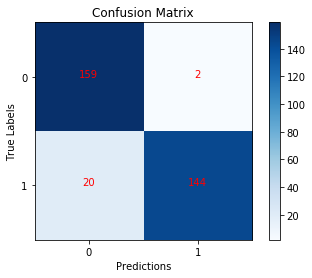

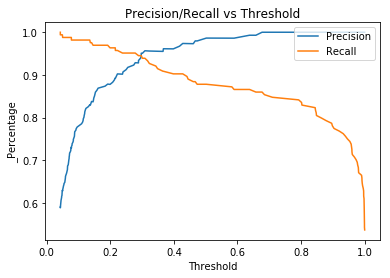

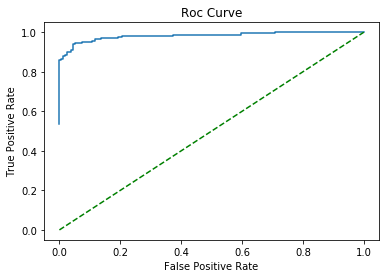

In [32]:
conf_matrix_recall_precision_roc(y_te_underSample, rf_y_pred_uS, X_te_underSample, rf)

### RandomForest on Whole dataset 

Recall score is a bit worse than LogisticRegression. These scores will fluctuate because of the random sampling. We can run this process 100 times and pick out the best one in the future.

In [33]:
rf_pred_fS = rf.predict(X_fullSample)

Accuracy: 0.988781876849937 
Recall Score: 0.9085365853658537 
Precision Score: 0.12427022518765637


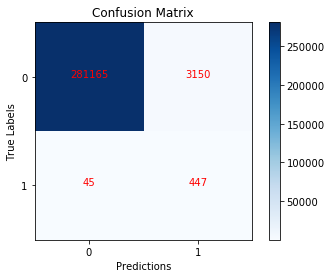

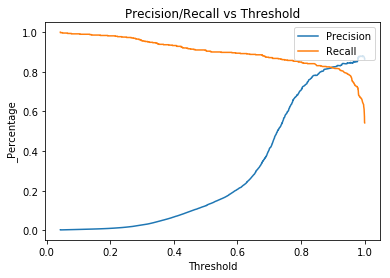

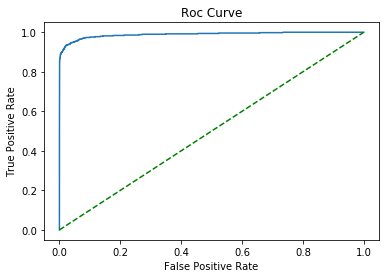

In [34]:
conf_matrix_recall_precision_roc(y_fullSample, rf_pred_fS, X_fullSample, rf)